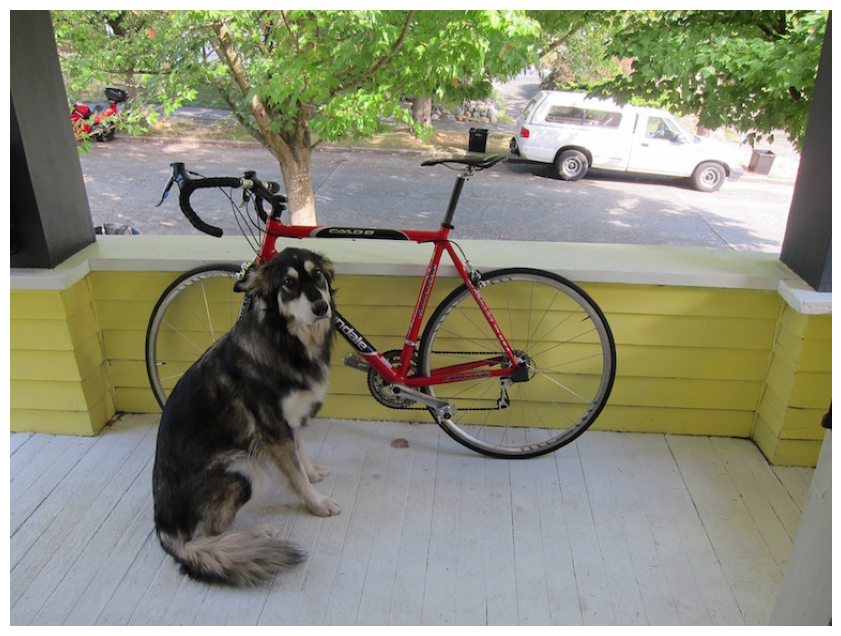

In [13]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Define a function to load the model
def load_model():
    # Load a pre-trained Faster R-CNN model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    # Replace the classifier with a new one
    num_classes = 91  # COCO dataset has 80 classes + 1 background
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

# Define a function to perform inference
def detect_objects(image_path, model):
    # Load the image
    image = Image.open(image_path)
    # Convert the image to tensor
    image_tensor = F.to_tensor(image)
    # Add a batch dimension
    image_tensor = image_tensor.unsqueeze(0)
    
    # Put the model in evaluation mode
    model.eval()
    
    # Perform inference
    with torch.no_grad():
        predictions = model(image_tensor)
    
    # Extract bounding boxes, labels, and scores
    boxes = predictions[0]['boxes']
    labels = predictions[0]['labels']
    scores = predictions[0]['scores']
    
    return image, boxes, labels, scores

# Define a function to draw bounding boxes and labels on the image
def draw_boxes(image, boxes, labels, scores, threshold=0.5):
    # Create a draw object
    draw = ImageDraw.Draw(image)
    
    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", 16)
    except IOError:
        font = ImageFont.load_default()
    
    for box, label, score in zip(boxes, labels, scores):
        if score >= threshold:
            # Draw the bounding box
            draw.rectangle(((box[0], box[1]), (box[2], box[3])), outline="red", width=3)
            
            # Draw the label and score
            text = f'Label: {label}, Score: {score:.2f}'
            text_size = draw.textsize(text, font=font)
            text_location = (box[0], box[1] - text_size[1])
            textbox_location = [text_location, (text_location[0] + text_size[0], text_location[1] + text_size[1])]
            draw.rectangle(textbox_location, fill="red")
            draw.text(text_location, text, fill="white", font=font)
    
    return image

# Load the model
model = load_model()

# Specify the path to the image
image_path = 'dog.jpg'

# Perform object detection
image, boxes, labels, scores = detect_objects(image_path, model)

# Draw the bounding boxes and labels on the image
image_with_boxes = draw_boxes(image, boxes, labels, scores)

# Display the image with bounding boxes and labels
plt.figure(figsize=(12, 8))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()


In [3]:
classes = [i[1]['name'] for i in categories.items()]
classes


In [9]:
# !pip install torchvision